In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

data = pd.read_csv('C:/Users/hasan/Downloads/survey_results_public.csv') #changed the source
#data_lastyear = pd.read_csv('survey_results_public2020.csv')
pd.set_option('display.max_columns', 100) # displays enough columns
# for working with salaries the problem is that total money and purchasing power are different? f.e compare India and US
# focus on US/EU?
#gender/race pay gap present in developer industry? if so, did it get better over time?
#difference in behaviour if NEWStuck depending on gender, age, education?

In [2]:
data.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

In [3]:
schema_df = pd.read_csv('C:/Users/hasan/Downloads/survey_results_schema.csv')
schema_df

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
3,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
4,QID24,Employment,Which of the following best describes your cur...,False,MC,MAVR
5,QID6,Country,"Where do you live? <span style=""font-weight: b...",True,MC,DL
6,QID7,US_State,<p>In which state or territory of the USA do y...,False,MC,DL
7,QID9,UK_Country,In which part of the United Kingdom do you liv...,False,MC,DL
8,QID190,S2,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
9,QID25,EdLevel,Which of the following best describes the high...,False,MC,SAVR


In [4]:
column_definitions = schema_df[schema_df['qname'].isin(data.columns)]

for col, row in column_definitions.iterrows():
    print(row['qname'])
    print(row['question'], '\n')

MainBranch
Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code." <b>*</b> 

Employment
Which of the following best describes your current <b>employment status</b>? 

Country
Where do you live? <span style="font-weight: bolder;">*</span> 

US_State
<p>In which state or territory of the USA do you live? <i>This information will be kept private.</i></p> 

UK_Country
In which part of the United Kingdom do you live? <i>This information will be kept private.</i> 

EdLevel
Which of the following best describes the highest level of formal education that you’ve completed? * 

Age1stCode
At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)  

LearnCode
How did you learn to code? Select all that apply. 

YearsCode
Including any education, how many years have you been coding in total? 

YearsCodePro
NOT including education, how many years have you coded professionally (as a part of you

In [5]:
data.filter(['MainBranch', 'Employment','Country', 'EdLevel', 'Age1stCode', 'YearsCode', 'YearsCodePro', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'NEWStuck', 'Age', 'Gender', 'Ethnicity', 'MentalHealth', 'ConvertedCompYearly' ])

,MainBranch,Employment,Country,EdLevel,Age1stCode,YearsCode,YearsCodePro,LanguageHaveWorkedWith,LanguageWantToWorkWith,NEWStuck,Age,Gender,Ethnicity,MentalHealth,ConvertedCompYearly
0,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,"Secondary school (e.g. American high school, G...",18 - 24 years,NaN,NaN,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,Call a coworker or friend;Visit Stack Overflow...,25-34 years old,Man,White or of European descent,None of the above,62268.0
1,I am a student who is learning to code,"Student, full-time",Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,7,NaN,JavaScript;Python,NaN,Visit Stack Overflow;Google it,18-24 years old,Man,White or of European descent,None of the above,NaN
2,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,NaN,NaN,Assembly;C;Python;R;Rust,Julia;Python;Rust,Visit Stack Overflow;Google it;Watch help / tu...,18-24 years old,Man,Prefer not to say,None of the above,NaN
3,I am a developer by profession,Employed full-time,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,JavaScript;TypeScript,JavaScript;TypeScript,Call a coworker or friend;Visit Stack Overflow...,35-44 years old,Man,White or of European descent,NaN,NaN
4,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,17,10,Bash/Shell;HTML/CSS;Python;SQL,Bash/Shell;HTML/CSS;Python;SQL,Visit Stack Overflow;Go for a walk or other ph...,25-34 years old,Man,White or of European descent,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83434,I am a developer by profession,Employed full-time,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,6,5,Clojure;Kotlin;SQL,Clojure,Call a coworker or friend;Google it,25-34 years old,Man,White or of European descent,I have a concentration and/or memory disorder ...,160500.0
83435,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Benin,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,4,2,NaN,NaN,Call a coworker or friend;Visit Stack Overflow...,18-24 years old,Man,Black or of African descent,None of the above,3960.0
83436,I am a developer by profession,Employed full-time,United States of America,"Secondary school (e.g. American high school, G...",11 - 17 years,10,4,Groovy;Java;Python,Java;Python,Call a coworker or friend;Visit Stack Overflow...,25-34 years old,Man,White or of European descent,None of the above,90000.0
83437,I am a developer by profession,Employed full-time,Canada,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,5,3,Bash/Shell;JavaScript;Node.js;Python,Go;Rust,Call a coworker or friend;Visit Stack Overflow...,25-34 years old,Man,White or of European descent,I have a mood or emotional disorder (e.g. depr...,816816.0


In [7]:
data['LanguageWorkedWith'].str.contains('C++').sum()

KeyError: 'LanguageWorkedWith'

In [8]:
grouped_Country = data.groupby(['Country'])

In [9]:
#without C++! why does this not work with C++? see cell above
languages_Answers = ['Clojure', 'Dart', 'Java', 'Perl', 'APL', 'Node.js', 'LISP', 'Kotlin', 'Go', 'Scala', 'Crystal', 'HTML/CSS', 'Groovy', 'COBOL', 'Bash/Shell', 'Erlang', 'Delphi', 'C', 'F#', 'JavaScript', 'Swift', 'Elixir', 'PHP', 'TypeScript', 'Rust', 'SQL', 'Matlab', 'Julia', 'Python', 'Assembly', 'C#', 'VBA', 'Haskell', 'Objective-C', 'R', 'Ruby', 'PowerShell']

In [10]:
country_answers = data['Country'].value_counts()
country_uses_lang = grouped_Country['LanguageHaveWorkedWith'].apply(lambda x: x.str.contains('Java').sum())

In [11]:
df = pd.concat([country_answers, country_uses_lang], axis = 'columns', sort = False)

In [12]:
df.rename(columns={'Country': 'Respondents', 'LanguageHaveWorkedWith': 'java'}, inplace= True)
df.sum()

Respondents    83439
java           62371
dtype: int64

In [13]:
grouped_Country = data.groupby(['Country'])
df = data['Country'].value_counts()
df.rename({'Country': 'Respondents'}, inplace= True)
for str in languages_Answers:
    temp = grouped_Country['LanguageHaveWorkedWith'].apply(lambda x: x.str.contains(str).sum())
    df = pd.concat([df,temp], axis = 'columns', sort = False)
    df.rename(columns={'LanguageHaveWorkedWith': str}, inplace= True)

In [14]:
df

,Country,Clojure,Dart,Java,Perl,APL,Node.js,LISP,Kotlin,Go,Scala,Crystal,HTML/CSS,Groovy,COBOL,Bash/Shell,Erlang,Delphi,C,F#,JavaScript,Swift,Elixir,PHP,TypeScript,Rust,SQL,Matlab,Julia,Python,Assembly,C#,VBA,Haskell,Objective-C,R,Ruby,PowerShell
United States of America,15288,477,419,11321,602,112,5321,345,982,1898,442,135,8492,567,82,5757,161,152,12016,197,9987,919,399,2152,4701,1584,7332,571,282,7975,916,4497,719,368,479,3707,1646,2252
India,10511,50,961,7987,142,43,3373,58,838,636,203,24,5844,199,48,1483,30,21,7696,15,6460,391,55,2044,2339,252,4289,529,81,5233,379,1632,301,62,278,974,311,593
Germany,5625,114,297,4147,166,25,1787,78,605,614,163,24,3030,250,16,1895,37,164,4357,55,3389,290,98,1233,1798,634,2505,263,94,2713,373,1527,267,199,145,1184,336,653
United Kingdom of Great Britain and Northern Ireland,4475,124,156,3192,130,27,1399,48,275,465,136,17,2450,130,20,1396,36,74,3444,72,2850,210,76,815,1387,378,2111,132,50,2149,212,1472,251,142,99,863,319,658
Canada,3012,53,117,2252,75,21,1115,46,188,361,58,14,1690,81,17,986,19,43,2355,27,1981,151,59,483,981,282,1360,152,52,1593,191,920,173,51,82,686,291,375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Saint Kitts and Nevis,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
Dominica,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,1,0,1,0,0,1,0,1,1,1,0,0,0,1
Saint Vincent and the Grenadines,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
Tuvalu,1,0,0,1,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,1,0,1,1,0,0,0,0,1,0,0


In [15]:
country_Respondents = data['Country'].value_counts()
df = df.rename(columns={'Country': 'Respondents'})
for str in languages_Answers:
     pd.concat([df, grouped_Country['LanguageHaveWorkedWith'].apply(lambda x: x.str.contains(str).sum())], axis = 'columns', sort = False)

In [16]:
grouped_Country['LanguageHaveWorkedWith'].apply(lambda x: x.str.contains('Python').sum()).loc['United States of America']

7975

In [17]:
1 - (data['MentalHealth'].isna().sum() + (data['MentalHealth'] == 'None of the above').sum()) /data.shape[0] # 1 out of 4 is not without health problems? that sounds like a lot
# sadly this question was not asked in any surveys pre Covid as far as I could see

0.24522105969630503

In [18]:
df = data.groupby(['YearsCode']).median()['ConvertedCompYearly']

<AxesSubplot:xlabel='YearsCode'>

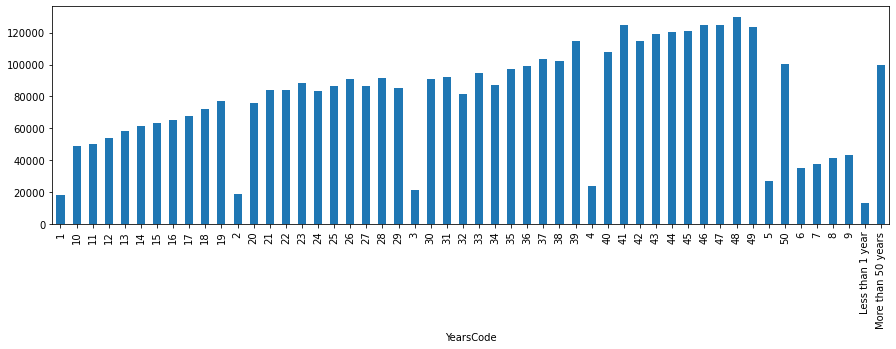

In [19]:
df.plot.bar(figsize=(15,4)) #how to sort the columns, why doenst it work the right way automatically?

In [20]:
#gender/race pay gap present in developer industry? if so, did it get better over time (todo?)?
#do we have enough data?
data.shape[0]-data['ConvertedCompYearly'].isna().sum()
#46844 is enough
data['ConvertedCompYearly'].median()

56211.0

In [21]:
data['Gender'].value_counts() #Most answered binary, so the others are statiscally irrelevant.

Man                                                                                   74817
Woman                                                                                  4120
Prefer not to say                                                                      1442
Non-binary, genderqueer, or gender non-conforming                                       690
Or, in your own words:                                                                  413
Man;Or, in your own words:                                                              268
Man;Non-binary, genderqueer, or gender non-conforming                                   252
Woman;Non-binary, genderqueer, or gender non-conforming                                 147
Man;Woman                                                                                41
Non-binary, genderqueer, or gender non-conforming;Or, in your own words:                 21
Man;Woman;Non-binary, genderqueer, or gender non-conforming                     

In [22]:
GenderSalary = data.groupby(['Gender', 'Country'])['ConvertedCompYearly']

In [23]:
top_ten=data['Country'].value_counts().nlargest(10)
gender_gap=((GenderSalary.median()['Man']/GenderSalary.median()['Woman'])-1)[top_ten.index] #top_ten = highest surveyed countries, for others the values become unusable
print(gender_gap)
# is this represantive? what happend in poland?
# for germany the results are only 3% off, this site says 18% for 2020 https://www.destatis.de/DE/Themen/Arbeit/Arbeitsmarkt/Qualitaet-Arbeit/Dimension-1/gender-pay-gap.html

United States of America                                0.175926
India                                                   0.271088
Germany                                                 0.153867
United Kingdom of Great Britain and Northern Ireland    0.276600
Canada                                                  0.111109
France                                                  0.197962
Brazil                                                  0.171553
Poland                                                  0.625185
Netherlands                                             0.252742
Italy                                                   0.152965
Name: ConvertedCompYearly, dtype: float64


Text(0, 0.5, 'Gender gap percent')

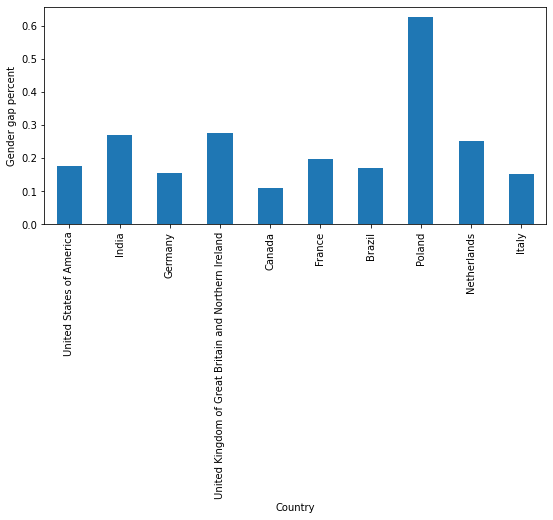

In [24]:
gender_gap.plot.bar(figsize=(9,4))
plt.xlabel('Country')
plt.ylabel('Gender gap percent')

In [25]:
#lets do the same for race? (todo?)

In [26]:
EdLevelSalary = data.groupby(['EdLevel'])['ConvertedCompYearly'].median().sort_values()

<AxesSubplot:xlabel='EdLevel'>

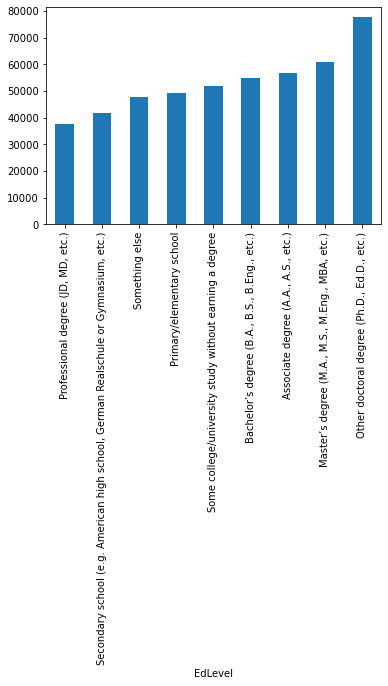

In [27]:
EdLevelSalary.plot.bar()

In [28]:
#check for missed values
#List of all the coloumns with missing values
data.isna().any()

ResponseId                      False
MainBranch                      False
Employment                       True
Country                         False
US_State                         True
UK_Country                       True
EdLevel                          True
Age1stCode                       True
LearnCode                        True
YearsCode                        True
YearsCodePro                     True
DevType                          True
OrgSize                          True
Currency                         True
CompTotal                        True
CompFreq                         True
LanguageHaveWorkedWith           True
LanguageWantToWorkWith           True
DatabaseHaveWorkedWith           True
DatabaseWantToWorkWith           True
PlatformHaveWorkedWith           True
PlatformWantToWorkWith           True
WebframeHaveWorkedWith           True
WebframeWantToWorkWith           True
MiscTechHaveWorkedWith           True
MiscTechWantToWorkWith           True
ToolsTechHav

In [29]:
print('Number of columns with missing values:',len(data.columns[data.isnull().any()].to_list()))

Number of columns with missing values: 45


In [30]:
#Percentage of missing values
data.isnull().sum()/data.shape[0] *100

ResponseId                       0.000000
MainBranch                       0.000000
Employment                       0.139024
Country                          0.000000
US_State                        82.118674
UK_Country                      94.705114
EdLevel                          0.375124
Age1stCode                       0.234902
LearnCode                        0.570477
YearsCode                        2.154868
YearsCodePro                    26.633828
DevType                         20.320234
OrgSize                         27.221084
Currency                        26.796822
CompTotal                       43.452103
CompFreq                        37.499251
LanguageHaveWorkedWith           1.296756
LanguageWantToWorkWith           7.931543
DatabaseHaveWorkedWith          16.650487
DatabaseWantToWorkWith          30.129795
PlatformHaveWorkedWith          37.517228
PlatformWantToWorkWith          50.120447
WebframeHaveWorkedWith          26.045374
WebframeWantToWorkWith          37

In [31]:
#columns with more than 75% missing values
print(data.columns[data.isnull().mean()>0.75].to_list())
print('Number of columns with more the 75% missing values:',len(data.columns[data.isnull().mean()>0.75].to_list()))

['US_State', 'UK_Country']
Number of columns with more the 75% missing values: 2


In [32]:
countries = data['Country'].unique()
print("Total Countries: {0}".format(len(countries)))

Total Countries: 181


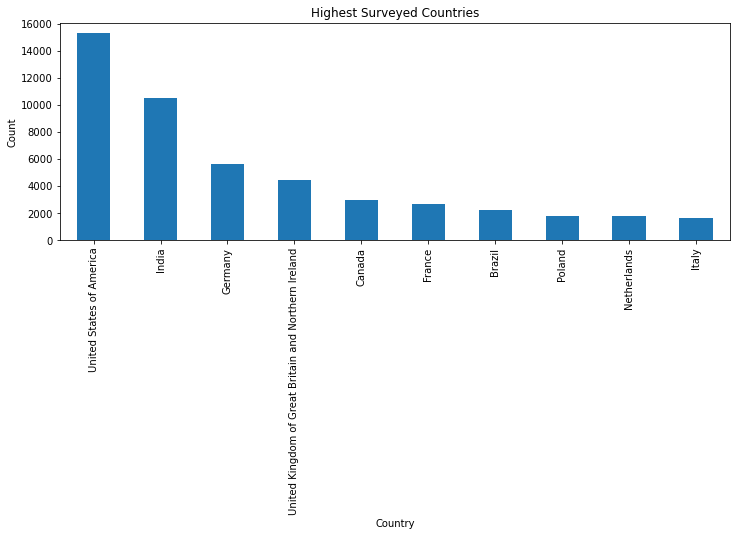

In [33]:
#Highest Surveyed Countries

top_ten=data['Country'].value_counts().nlargest(10)


plt.subplots(figsize=(12,4))
top_ten.plot.bar(title='Highest Surveyed Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

In [34]:
# EDA on used programming languages in this survey

temp=data['LanguageHaveWorkedWith'].dropna() #clean data
language=[]
for i in temp:
    if (i != None and type(i) != int):
        x = i.split(";")
        language.append(x)



#count users of the used languages
from collections import Counter
import itertools


languages=list(itertools.chain.from_iterable(language)) #to get rid of the nested list

duplicate_dict = Counter(languages) #dictionary of langugaes and the number of its users

print(duplicate_dict)  

df_languages=pd.DataFrame.from_dict(duplicate_dict,orient='index', columns=['Total Users'])
df_languages


Counter({'JavaScript': 53587, 'HTML/CSS': 46259, 'Python': 39792, 'SQL': 38835, 'Java': 29162, 'Node.js': 27975, 'TypeScript': 24909, 'C#': 22984, 'Bash/Shell': 22385, 'C++': 20057, 'PHP': 18130, 'C': 17329, 'PowerShell': 8871, 'Go': 7879, 'Kotlin': 6866, 'Rust': 5799, 'Ruby': 5569, 'Dart': 4965, 'Assembly': 4632, 'Swift': 4204, 'R': 4185, 'VBA': 3847, 'Matlab': 3846, 'Groovy': 2479, 'Objective-C': 2310, 'Scala': 2148, 'Perl': 2028, 'Haskell': 1749, 'Delphi': 1731, 'Clojure': 1552, 'Elixir': 1438, 'LISP': 1096, 'Julia': 1068, 'F#': 804, 'Erlang': 651, 'APL': 536, 'Crystal': 466, 'COBOL': 437})


,Total Users
C++,20057
HTML/CSS,46259
JavaScript,53587
Objective-C,2310
PHP,18130
Swift,4204
Python,39792
Assembly,4632
C,17329
R,4185


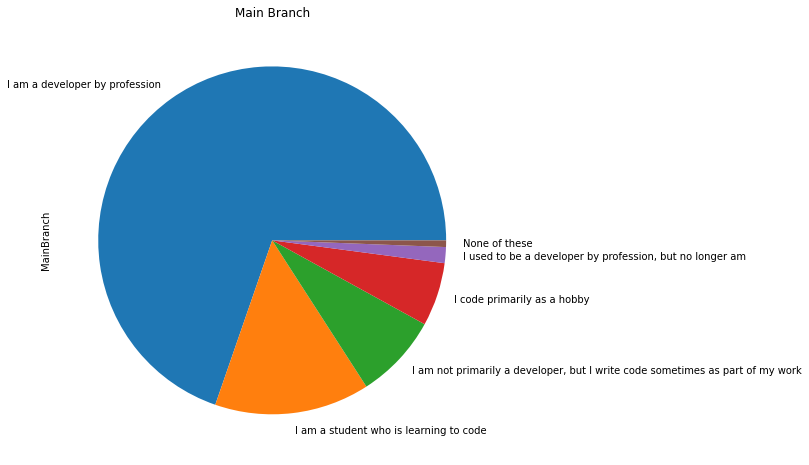

In [35]:
# Proffession of surveyed users
proffession=data['MainBranch'].value_counts()
proffession.plot(kind='pie',figsize=(8,8),title='Main Branch')
plt.show()

<AxesSubplot:xlabel='Years of coding experience', ylabel='Programmers'>

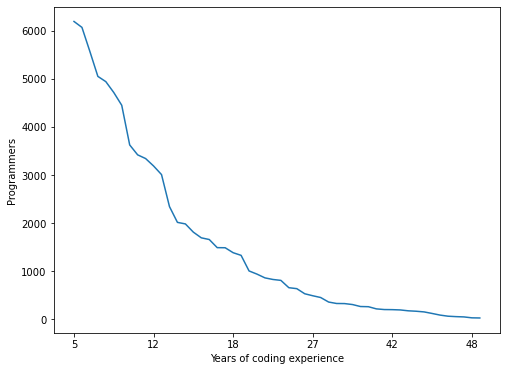

In [36]:
#let's have a look on coding experience ..
# but first, we should clean our data from non numeric values

data.loc[data['YearsCode'] =='Less than 1 year'] = 0
data.loc[data['YearsCode'] =='More than 50 years'] = 50
experience = data['YearsCode'].value_counts()
plt.xlabel("Years of coding experience")
plt.ylabel("Programmers")
experience.plot(figsize=(8,6))

Text(0.5, 1.0, 'Relationship between Salary and Years of Coding for Education level')

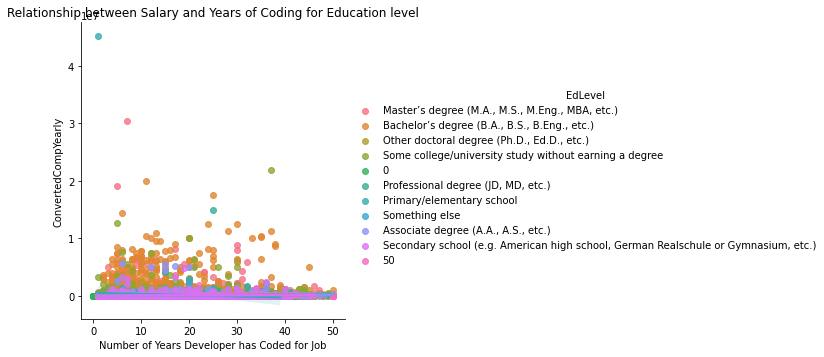

In [37]:
multidata = data[['EdLevel','ConvertedCompYearly', 'YearsCode']].dropna(axis=0, how='any')
multidata = multidata.astype({"ConvertedCompYearly": int,"YearsCode": int})

#multidata.plot.scatter(x='YearsCode',y='ConvertedCompYearly')
import seaborn as sns

sns.lmplot(y='ConvertedCompYearly', x='YearsCode', data=multidata, hue='EdLevel')
plt.xlabel('Number of Years Developer has Coded for Job')
plt.title('Relationship between Salary and Years of Coding for Education level')

In [38]:
data['MainBranch'].value_counts()

I am a developer by profession                                                   57904
I am a student who is learning to code                                           11129
I am not primarily a developer, but I write code sometimes as part of my work     6489
I code primarily as a hobby                                                       4669
0                                                                                 1489
I used to be a developer by profession, but no longer am                          1194
None of these                                                                      395
50                                                                                 170
Name: MainBranch, dtype: int64

In [39]:
# separating male and female: 

male = data[data.Gender == 'Man']  
male.shape

(73517, 48)

In [40]:
female = data[data.Gender == 'Woman']  
female.shape

(3925, 48)

In [41]:
# now we can see median coding experience for both genders

male.YearsCode.median() 

10.0

In [42]:
female.YearsCode.median() 

7.0

In [43]:
data['OpSys'].value_counts()

Windows                              36733
Linux-based                          20845
MacOS                                20744
Windows Subsystem for Linux (WSL)     2695
0                                     1489
Other (please specify):                505
50                                     170
BSD                                    130
Name: OpSys, dtype: int64

In [44]:
#Lets see which country is the maximum for EmploymentStatus
top_cnt_EmploymentStatus = data[data['Employment']== 'Employed full-time']['Country'].value_counts()
print("Maximum Full time employee country: {0}".format(top_cnt_EmploymentStatus.index[0]))

Maximum Full time employee country: United States of America
